In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.columns)
print(df.shape)
df.head()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [212]:
df.info() #no nulls in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [213]:
df_num = df.select_dtypes(include=['int64', 'float64']).drop('SeniorCitizen', axis=1)
df_num.head(5)
df_num.describe()


,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [214]:
df_cata = df.select_dtypes(include='object').drop('customerID', axis=1)
df_cata['SeniorCitizen'] = df['SeniorCitizen']
df_cata.head(5)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,SeniorCitizen
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes,0
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No,0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes,0


In [215]:
for col in df_cata.columns:
    print(df[col].value_counts())
    print('\n')

gender
Male      3555
Female    3488
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


StreamingTV
No       

In [216]:
# the total charges value does't make sence as object type
# df_num['TotalCharges']= [float(str_vals) for str_vals in df_cata['TotalCharges'].to_numpy()]
float(df_cata['TotalCharges'][0])
# df_cata['TotalCharges'].astype(float) # there are empty strings
str_float_totalcharges = pd.to_numeric(df_cata['TotalCharges'], errors='coerce')
df_num['TotalCharges'] = str_float_totalcharges
df_cata_v1 = df_cata.drop('TotalCharges', axis=1)
df_num.info()
df_cata_v1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 165.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   Partner           7043 non-null   object
 2   Dependents        7043 non-null   object
 3   PhoneService      7043 non-null   object
 4   MultipleLines     7043 non-null   object
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9  

In [217]:
nulls = df_num["TotalCharges"].isna().sum()
print(nulls)


11


In [218]:
# for the nulls
df_num['TotalCharges'] =df_num['TotalCharges'].fillna(df_num['TotalCharges'].mean())
df_num.info()
df_num.describe()
df_num.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7043 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 165.2 KB


,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


 df_cata_v1 and df_num are cleaned

In [219]:
from sklearn.preprocessing import OrdinalEncoder

df_cata_encoder = OrdinalEncoder()
df_cata_encoded = pd.DataFrame(df_cata_encoder.fit_transform(df_cata_v1), columns=df_cata_v1.columns)
print(df_cata_encoder.categories_)
df_cata_encoded.head(5)

[array(['Female', 'Male'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'No phone service', 'Yes'], dtype=object), array(['DSL', 'Fiber optic', 'No'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['Month-to-month', 'One year', 'Two year'], dtype=object), array(['No', 'Yes'], dtype=object), array(['Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'], dtype=object), array(['No', 'Yes'], dtype=object), array([0, 1])]


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0


In [220]:
df_concated = pd.concat([df_cata_encoded,df_num], axis=1)
df_concated.head(5)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1,29.85,29.85
1,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,34,56.95,1889.50
2,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,2,53.85,108.15
3,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,45,42.30,1840.75
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,2,70.70,151.65


<Axes: xlabel='MonthlyCharges', ylabel='tenure'>

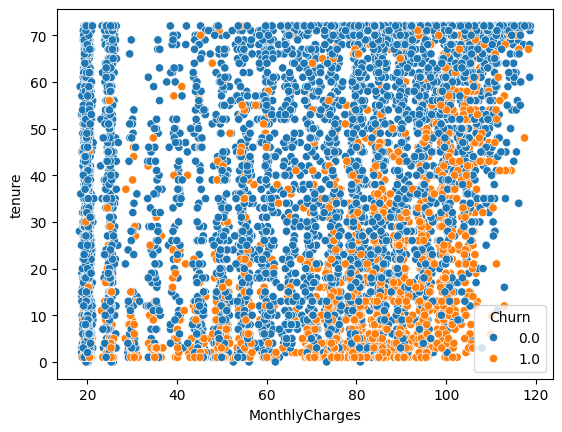

In [221]:
sns.scatterplot(x=df_concated["MonthlyCharges"], y=df_concated["tenure"], hue=df_concated["Churn"])


this output makes sense because if length of time customer been in service is high (tenure), then the less likely they are to unsubscribe (low churn in top right). Could be due to service quality and/or reliability
Also with higher monthly charges, more are likly to unsubscribe with less time with the service (low tenure near bottom left).

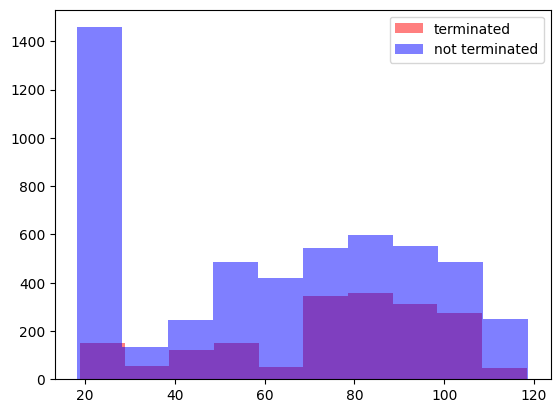

In [222]:
plt.hist(df_concated[df_concated['Churn'] == 1.0]['MonthlyCharges'], alpha=0.5, color="red", label='terminated', bins=10)
plt.hist(df_concated[df_concated['Churn'] == 0.0]['MonthlyCharges'], alpha=0.5, label="not terminated", color="blue", bins=10)

plt.legend()
plt.show()


with low monthly charges more people are subscribed with minimal terminations. makes sense.
increase in monthy chrges shows more terminations. between the ranges of 70 dollars to 110 dollars. also less are subscribed


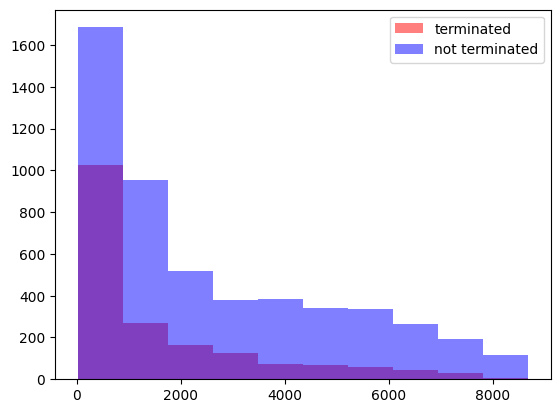

In [223]:
plt.hist(df_concated[df_concated['Churn'] == 1.0]['TotalCharges'], alpha=0.5, color="red", label='terminated', bins=10)
plt.hist(df_concated[df_concated['Churn'] == 0.0]['TotalCharges'], alpha=0.5, label="not terminated", color="blue", bins=10)
plt.legend()
plt.show()

is left skewd. With low total charges most have terminated but most are subscribed. 
with high total payments the number of subscribed are very low but also has less terminations.